# A origem dos Jogadores ⚽

## 1. Introdução

### 1.1 Motivação do Trabalho

### 1.2 Objetivos da Análise

## 2. Sobre o Dataset

### 2.1 Descrição do Dataset

### 2.2 Exploração Inicial dos Dados

*Importando as Bibliotecas necessárias para trabalhar com o dataset*

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans

#Importando as funções criadas por nós
import funcoes as fun

Importando o dataset 

In [16]:
data = pd.read_csv('archive/male_players.csv',low_memory=False)

## 3. Pré-processamento do Dataset

### 3.1 Limpeza e tranformação dos dados

#### 3.1.1 Limpeza dos dados

In [17]:
# Verificando se existe valores nulos
display(data.isnull().sum())
display(data.info())

player_id       0
player_url      0
fifa_version    0
fifa_update     0
update_as_of    0
               ..
lcb             0
cb              0
rcb             0
rb              0
gk              0
Length: 109, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Columns: 109 entries, player_id to gk
dtypes: float64(20), int64(43), object(46)
memory usage: 149.7+ MB


None

Não existem valores nulos no nosso dataset.Então não se faz necessária a limpeza nesse aspecto.

#### 3.1.2 Divindo o Dataset por categoria

Fazendo a divisão do Dataset por categorias, selecionando as habilidades mais relevantes por setor.

**Categoria Defensiva**

A categoria defensiva engloba os jogares responsáveis por defender e recuperar a posse da bola. Ela busca, portanto diminuir a amplitude da equipe adversária.

Essa categoria engloba os goleiros, os zagueiros, os laterais e os alas defensivos. 

Para os laterais a velocidade foi considerada como atributo principal, tendo em consideração a necessidade deles em acompanhar os adversários. 

Para os zagueiros foi eleito a noção defensiva, levanndo em consideração sua responsabilidade de proteger a área, impedindo o avanço dos adversários.

Já nos goleiro os reflexos foram atribuídos como habilidade de maior impacto no desempenho.

In [4]:
#Filtrando para que o dataset pegue todas as colunas que contenham ao menos uma dessas posições
busca = "GK|CB|LB|RB|LWB|RWB"

defense_players = data[data["player_positions"].str.contains(busca)]

In [21]:
#Filtrando as categorias importantes
defense_players = defense_players[["fifa_version", "player_positions", "short_name",
                                   "movement_sprint_speed","defending_marking_awareness","goalkeeping_reflexes","overall" ]]

defense_players

,fifa_version,player_positions,short_name,movement_sprint_speed,defending_marking_awareness,goalkeeping_reflexes,overall
6,24.0,GK,T. Courtois,52,20,93,90
9,24.0,GK,Alisson,49,15,89,89
11,24.0,CB,Rúben Dias,69,91,12,89
13,24.0,GK,M. ter Stegen,50,25,91,89
15,24.0,CB,V. van Dijk,87,90,11,89
...,...,...,...,...,...,...,...
180013,15.0,GK,L. Pilling,41,25,45,42
180015,15.0,GK,S. Ramsbottom,40,25,44,42
180016,15.0,CB,E. Redman,66,38,6,41
180018,15.0,"LM, LB",P. Żemło,58,54,9,40


**Categoria de Meio-Campo**

A categoria Meio-Campo engloba os jogares responsáveis pelo jogo rodar.
São parte dela os meia-centrais, os volantes, os meia-abertas e os meia-atacantes.

Para os volantes, meia-centrais e meia-atacantes o passe curto é o atributo mais importante, já que eles são os maiores responsáveis por distribuir os passes. 


Para os meias-abertos, o drible foi considerado um fator de destaque, pois, assim como os pontas, eles frequentemente realizam jogadas individuais

In [22]:
busca = "CDM|LM|RM|CM|CAM"

midfield_players = data[data["player_positions"].str.contains(busca)]

In [23]:

midfield_players = midfield_players[["fifa_version", "player_positions", "short_name",
                                   "attacking_short_passing","dribbling","overall"]]

midfield_players

,fifa_version,player_positions,short_name,attacking_short_passing,dribbling,overall
2,24.0,"CM, CAM",K. De Bruyne,94,87.0,91
3,24.0,"CF, CAM",L. Messi,91,94.0,90
10,24.0,"CDM, CM",Rodri,89,80.0,89
14,24.0,CDM,Casemiro,84,73.0,89
17,24.0,"CM, RW",F. Valverde,87,84.0,88
...,...,...,...,...,...,...
180009,15.0,"LM, ST",L. Davies,37,46.0,43
180012,15.0,"CM, CDM, RM",M. Palmer,44,38.0,42
180014,15.0,CM,M. Maier,47,45.0,42
180018,15.0,"LM, LB",P. Żemło,40,31.0,40


**Categoria Ataque**

A categoria Ataque engloba os jogadores encarregados de finalizar as jogadas. Sendo eles os pontas, centroavantes e segundo-atacantes.

Para os pontas, o drible é a característica de destaque pois, assim como os meia-abertos, eles praticam mais jogadas individuais. Tendo a diferença de que os pontas se destacam pelo drible, jogando principalmente nas laterais para cruzamentos, enquanto os meias-abertos tendem a operar centralmente, participando mais da construção das jogadas.

Para os centroavantes e segundo-atacantes a finalização é o principal, já que eles têm como papel principal finalizar as jogadas, ou seja, fazer o gol.

In [24]:
busca = "LW|ST|RW|CF"

attack_players = data[data["player_positions"].str.contains(busca)]

In [25]:

attack_players = attack_players[["fifa_version", "player_positions", "short_name",
                                   "attacking_finishing","dribbling", "overall"]]

attack_players

,fifa_version,player_positions,short_name,attacking_finishing,dribbling,overall
0,24.0,"ST, LW",K. Mbappé,94,92.0,91
1,24.0,ST,E. Haaland,96,80.0,91
3,24.0,"CF, CAM",L. Messi,89,94.0,90
4,24.0,"CF, ST",K. Benzema,91,87.0,90
5,24.0,ST,R. Lewandowski,93,87.0,90
...,...,...,...,...,...,...
179967,15.0,ST,S. Austin,48,48.0,46
179989,15.0,"ST, RW",J. Allen,45,47.0,45
179996,15.0,ST,A. Peterson,29,53.0,45
180009,15.0,"LM, ST",L. Davies,50,46.0,43


## 4. Desenvolvimento

 __Boxplots (finalizar)__

##### 1.3.1.Categoria Defensiva

In [ ]:
# For para calcular as medidas por ano e separando as posições por suas respectivas habilidades principais.
for i in range(15,25):
    fullbacks = defense_players[defense_players["player_positions"].isin(["LB", "RB", "LWB", "RWB"]) & (defense_players["fifa_version"] == i)]["movement_sprint_speed"].describe(exclude = defense_players["fifa_version"], include = None)
    print(f' Versão Fifa {i} - Laterais')
    print(fullbacks)
    fullbacks.plot(kind='box', title=f'Boxplot da Velocidade dos Laterais - FIFA Version {i}')
    plt.ylim(0,150)
    plt.show()


In [ ]:
for i in range(15,25):
    centrebacks = defense_players[defense_players["player_positions"].isin(["CB"]) & (defense_players["fifa_version"] == i)]["defending_marking_awareness"].describe(exclude = defense_players["fifa_version"], include = None)
    print(f' Fifa Version {i}')
    print(centrebacks)
    
    centrebacks.plot(kind='box', title=f'Boxplot da Noção Defensiva dos Zagueiros - FIFA Version {i}')
    plt.ylim(0,150)
    plt.show()
 

In [ ]:
for i in range(15,25):
    goalkeepers = defense_players[defense_players["player_positions"].isin(["GK"]) & (defense_players["fifa_version"] == i)]["goalkeeping_reflexes"].describe(exclude = defense_players["fifa_version"], include = None)
    print(f' Fifa Version {i}')
    print(goalkeepers)

    goalkeepers.plot(kind='box', title=f'Boxplot de Reflexo dos Goleiros - FIFA Version {i}')
    plt.ylim(0,150)
    plt.show()

##### 1.3.2.Categoria Meio-Campo

In [ ]:
for i in range(15,25):
    meias = midfield_players[midfield_players["player_positions"].isin(["CM", "CDM", "CAM"]) & (midfield_players["fifa_version"] == i)]["attacking_short_passing"].describe(exclude = midfield_players["fifa_version"], include = None)
    print(f'Fifa Version {i}')
    print(meias)
    
    meias.plot(kind='box', title=f'Boxplot do Passe curto dos Meias - FIFA Version {i}')
    plt.ylim(0,150)
    plt.show()

In [ ]:
for i in range(15,25):
    meias_abertos = midfield_players[midfield_players["player_positions"].isin(["RM", "LM"]) & (midfield_players["fifa_version"] == i)]["dribbling"].describe(exclude = midfield_players["fifa_version"], include = None)
    print(f'Fifa Version {i}')
    print(meias_abertos)
    meias_abertos.plot(kind='box', title=f'Boxplot do Drible dos Meias Abertos - FIFA Version {i}')
    plt.ylim(0,150)
    plt.show()

##### 1.3.3. Categoria Ataque

In [ ]:
for i in range(15,25):
    pontas = attack_players[attack_players["player_positions"].isin(["LW","RW"]) & (attack_players["fifa_version"] == i)]["dribbling"].describe(exclude = attack_players["fifa_version"], include = None)
    print(f' Fifa Version {i}')
    print(pontas)

    pontas.plot(kind='box', title=f'Boxplot de Drible dos Atacantes - FIFA Version {i}')
    plt.ylim(0,150)
    plt.show()

In [ ]:
for i in range(15,25):
    centroavantes = attack_players[attack_players["player_positions"].isin(["ST","CF"]) & (attack_players["fifa_version"] == i)]["attacking_finishing"].describe(exclude = attack_players["fifa_version"], include = None)
    print(f' Fifa Version {i}')
    print(centroavantes)
    
    centroavantes.plot(kind='box', title=f'Boxplot da Finalização dos Atacantes - FIFA Version {i}')
    plt.ylim(0,150)
    plt.show()


### 4.1 Média Geral entre os setores

Comparando a média entre os setores, descobri qual tem os jogadores com maiores overall.

In [21]:
# Pegando a médoa de overall por setor
media_defensores = np.mean(defense_players["overall"])
media_meias = np.mean(midfield_players["overall"])
media_atacantes = np.mean(attack_players["overall"])


setores = ['Defesa','Meio-Campo','Atacantes']
media_setor = [media_defensores,media_meias,media_atacantes]

<function matplotlib.pyplot.show(close=None, block=None)>

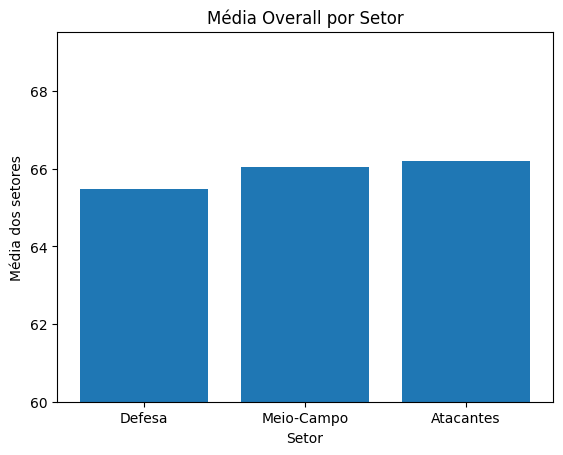

In [25]:
plt.bar(setores,media_setor)
plt.title('Média Overall por Setor')
plt.xlabel('Setor')
plt.ylabel('Média dos setores')

#Facilitar a visualição das diferenças de níveis entre eles
plt.ylim(60,None)
plt.show

Analisando esse gráfico, podemos observar que o setor defensivo possui a maior média de overall.

### 4.2 Constância entre os setores

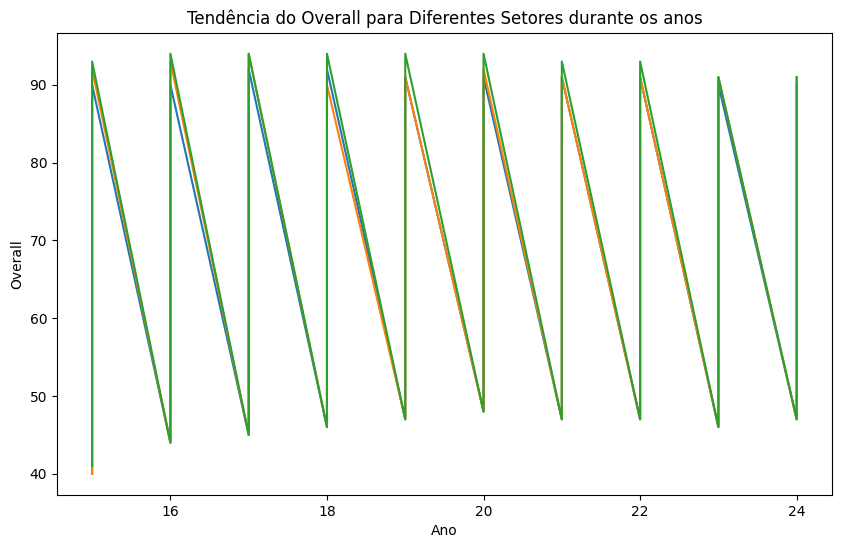

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(defense_players['fifa_version'],defense_players['overall'],label='Jogadores da Defesa')
ax.plot(midfield_players['fifa_version'],midfield_players['overall'],label='Jogadores de Meio-Campo')
ax.plot(attack_players['fifa_version'],attack_players['overall'],label='Jogadores de Ataque')

ax.set_xlabel('Ano')
ax.set_ylabel('Overall')
ax.set_title('Tendência do Overall para Diferentes Setores durante os anos')

plt.show()

### 4.3 Evolução das Habilidades ao longo dos Anos

#### 4.3.1 Centroavantes 

In [92]:
#Chamando a função para pegar os melhores 500 atributos por ano 
attack_finishing_df = fun.ComparePlayers("ST", attack_players, "attacking_finishing")

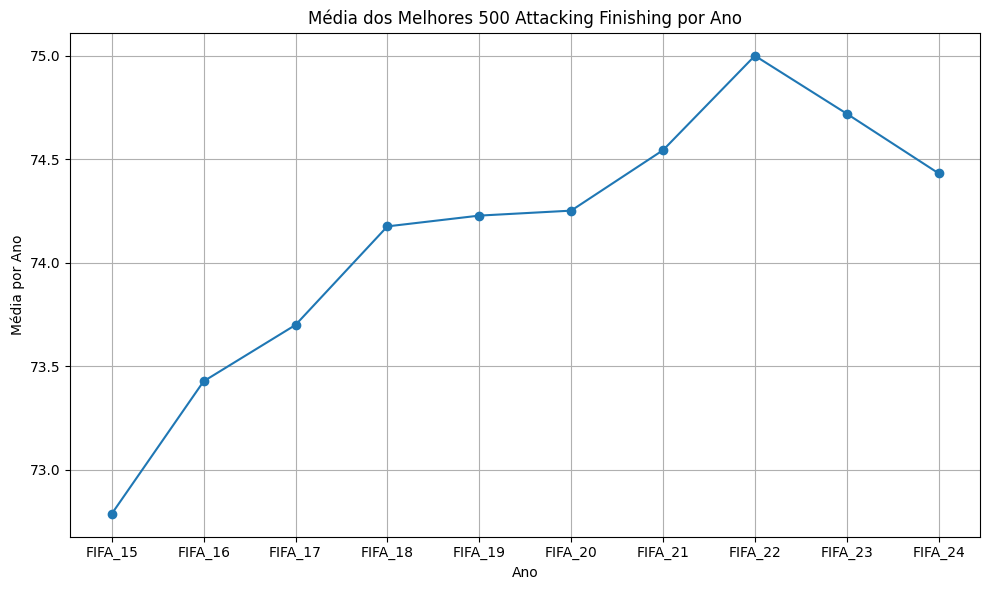

In [98]:
#Gráfico com mostrando a evolução durante os anos 
PlotLineGraph(attack_finishing_df, "Attacking Finishing")


#### 4.3.2 Goleiros

In [99]:
goal_reflexes_df = fun.ComparePlayers("GK", defense_players, "goalkeeping_reflexes")

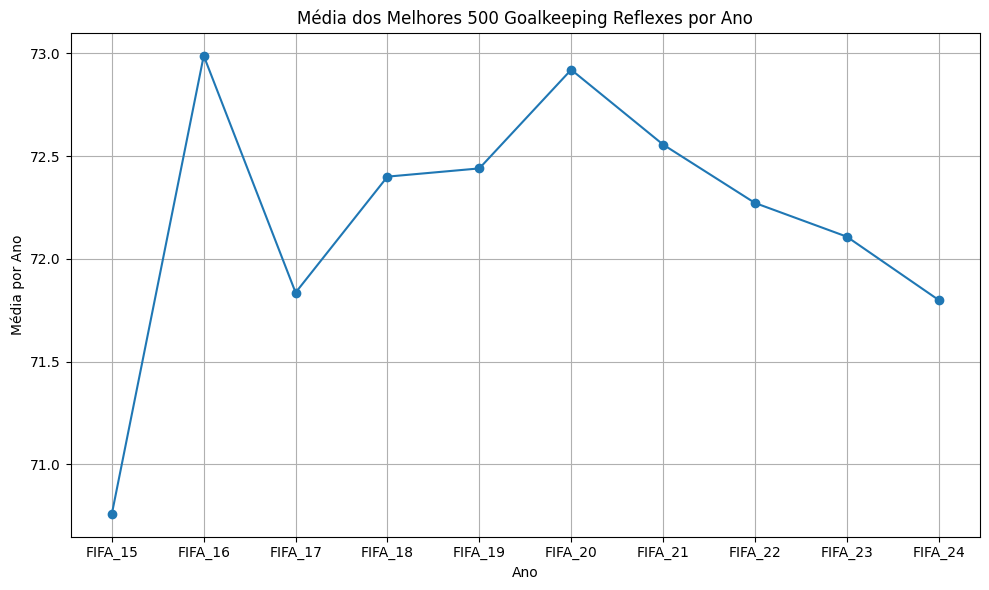

In [101]:
PlotLineGraph(goal_reflexes_df, "Goalkeeping Reflexes")

#### 4.3.4 Zagueiro

In [102]:
nocao_defensiva_df = fun.ComparePlayers("CB", defense_players, "defending_marking_awareness")

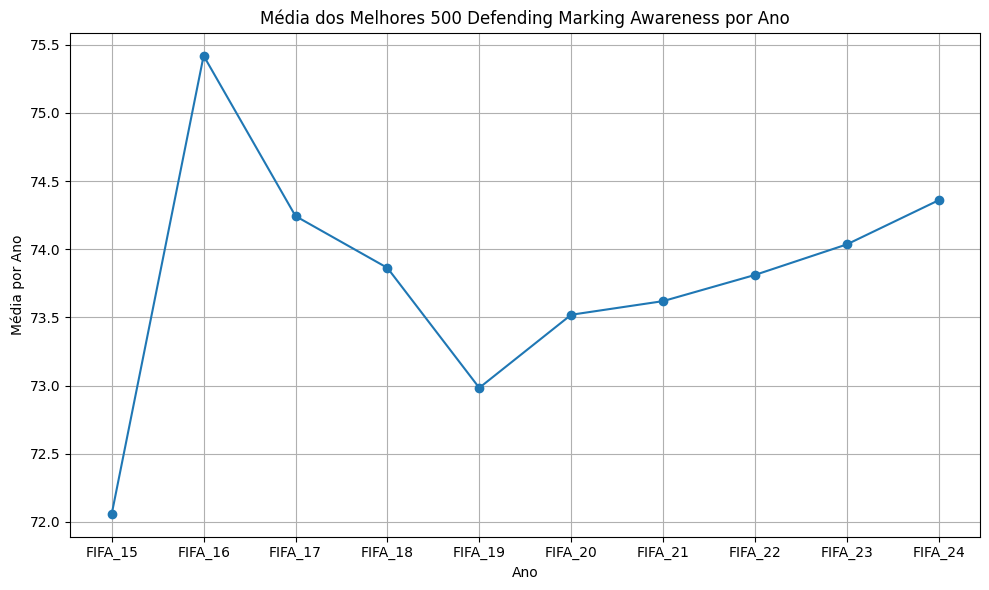

In [103]:
PlotLineGraph(nocao_defensiva_df,"Defending Marking Awareness")

#### 4.3.5 Meias 

In [104]:
passe_meias_df = fun.ComparePlayers("CM", midfield_players, "attacking_short_passing")

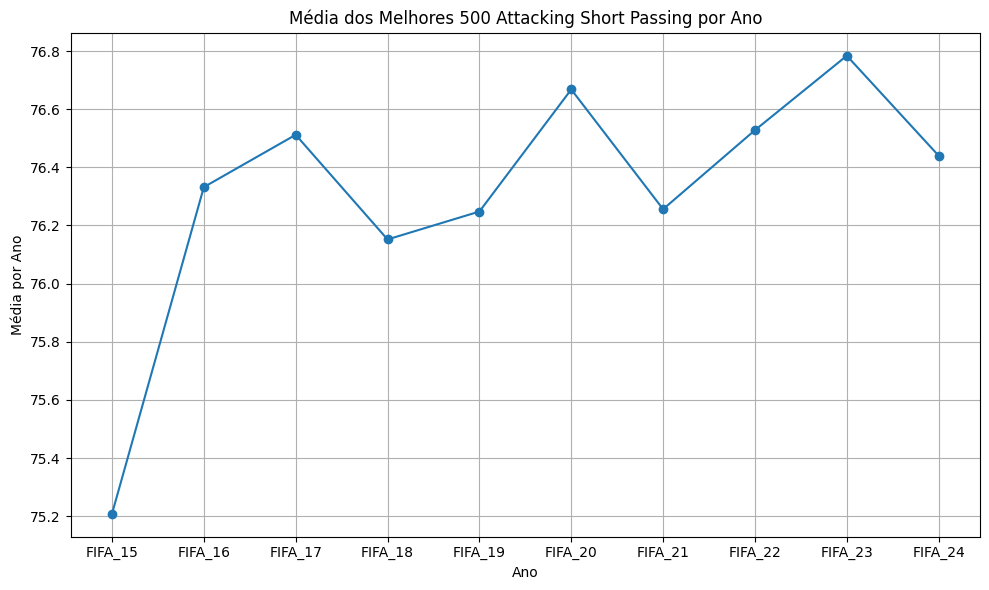

In [108]:
PlotLineGraph(passe_meias_df,"Attacking Short Passing")

#### 4.3.6 Pontas

In [111]:
drible_pontasD_df = fun.ComparePlayers("RW", attack_players, "dribbling")

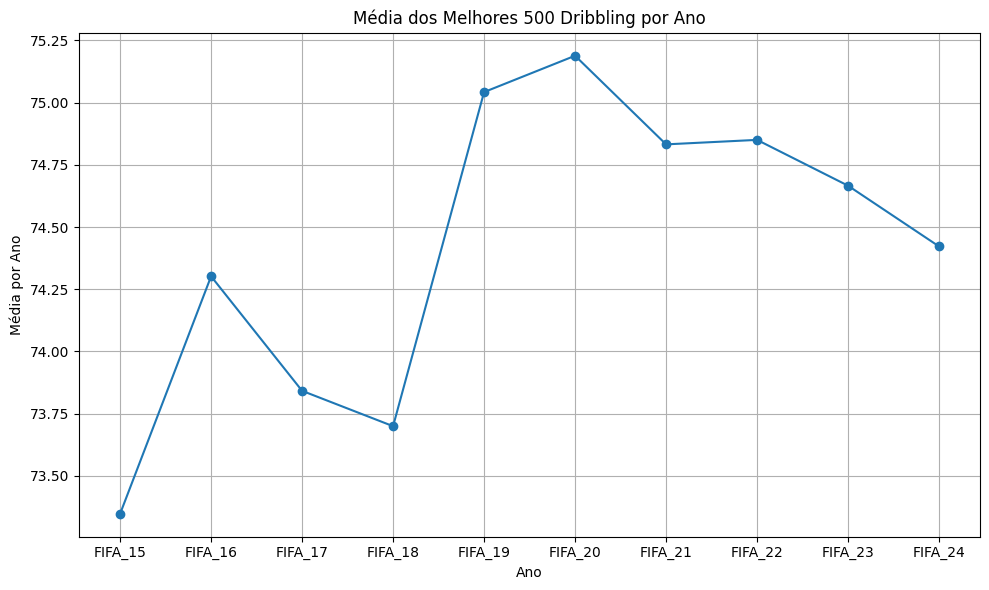

In [112]:
PlotLineGraph(drible_pontasD_df, "Dribbling")

#### 4.3.7 Laterais Direito

In [113]:
pace_lateraisD_df = fun.ComparePlayers("RB", defense_players, "movement_sprint_speed")

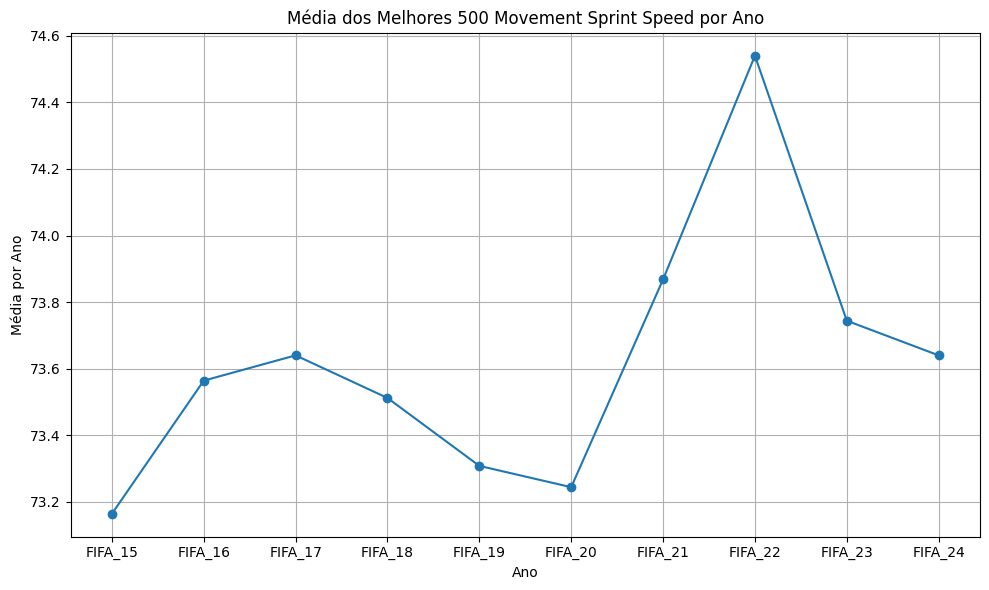

In [114]:
PlotLineGraph(pace_lateraisD_df, "Movement Sprint Speed")

### 4.4.Explorando Agrupamentos

#### 1.5.1. Centroavantes vs Goleiros

In [115]:
# Selecionar apenas as colunas numéricas
columns_af = attack_finishing_df.select_dtypes(include=int).columns

# Colocar os dados numéricos em uma lista
num_af =attack_finishing_df[columns_af].values.flatten().tolist()


In [116]:
columns_gk = goal_reflexes_df.select_dtypes(include=int).columns

num_gk = goal_reflexes_df[columns_gk].values.flatten().tolist()


In [121]:
#Transoformando em Matriz
af_gk = np.column_stack((num_af,num_gk))

num_clusters = 2

kmeans = KMeans(n_clusters=2)

kmeans.fit(af_gk)

centroids = kmeans.cluster_centers_

labels = kmeans.labels_


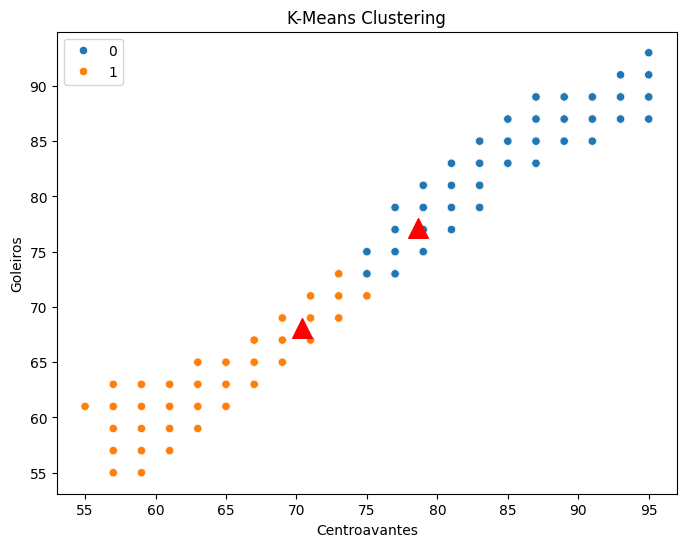

In [122]:
df = pd.DataFrame(data=af_gk, columns=['num_af', 'num_gk'])

plt.figure(figsize=(8, 6))


#PLotar os gráficos
sns.scatterplot(data=df, x=num_af, y=num_gk, hue=labels)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', s=200, c='red', label='Centróides')


plt.title("K-Means Clustering")
plt.xlabel("Centroavantes")
plt.ylabel("Goleiros")
plt.show()



#### 1.5.2. Zagueiros vs Meias

In [40]:

columns_nf = nocao_defensiva_df.select_dtypes(include=int).columns

num_nf =nocao_defensiva_df[columns_nf].values.flatten().tolist()


In [41]:

columns_df = passe_meias_df.select_dtypes(include=int).columns

num_df =passe_meias_df[columns_df].values.flatten().tolist()


In [42]:
#Transoformando em Matriz
nf_df = np.column_stack((num_nf,num_df))

kmeans = KMeans(n_clusters=2)

kmeans.fit(nf_df)

centroids = kmeans.cluster_centers_

labels = kmeans.labels_


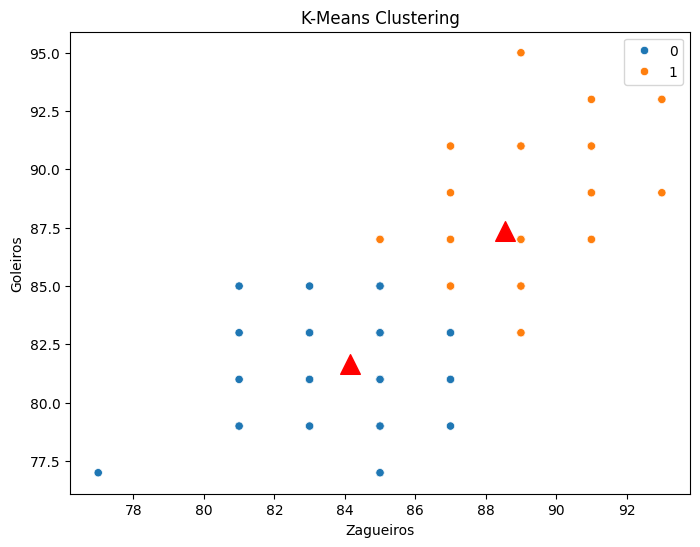

In [43]:
df = pd.DataFrame(data=af_gk, columns=['num_nf', 'num_df'])

plt.figure(figsize=(8, 6))


#PLotar os gráficos
sns.scatterplot(data=df, x=num_nf, y=num_df, hue=labels)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', s=200, c='red', label='Centróides')


plt.title("K-Means Clustering")
plt.xlabel("Zagueiros")
plt.ylabel("Goleiros")
plt.show()

#### 1.5.3. Laterais vs Pontas

In [44]:
columns_dp = drible_pontasD_df.select_dtypes(include=[int,float]).columns

num_dp = drible_pontasD_df[columns_dp].values.flatten().tolist()


In [45]:
columns_pl =pace_lateraisD_df.select_dtypes(include=int).columns

num_pl =pace_lateraisD_df[columns_pl].values.flatten().tolist()


In [46]:
#Transoformando em Matriz
dp_fl = np.column_stack((num_dp,num_pl))

kmeans = KMeans(n_clusters=2)

kmeans.fit(dp_fl)

centroids = kmeans.cluster_centers_

labels = kmeans.labels_


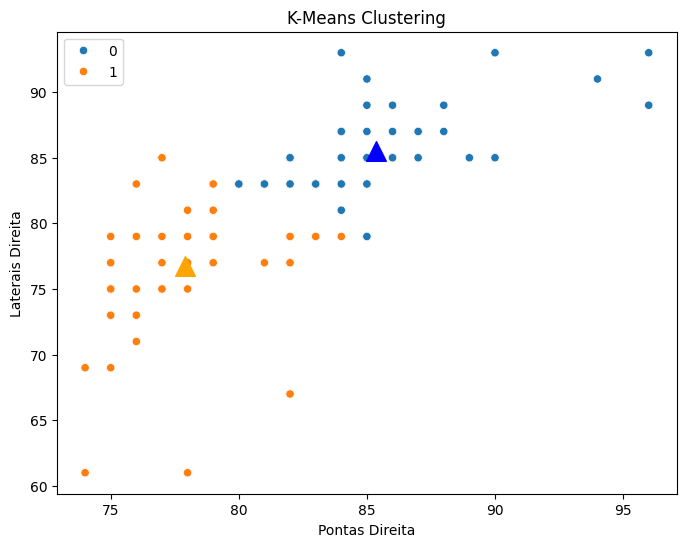

In [48]:
df = pd.DataFrame(data=dp_fl, columns=['num_dp', 'num_pl'])

plt.figure(figsize=(8, 6))


#PLotar os gráficos
sns.scatterplot(data=df, x=num_dp, y=num_pl, hue=labels)

plt.scatter(centroids[0, 0], centroids[0, 1], marker='^', s=200, c='blue', label='Centróides')
plt.scatter(centroids[1, 0], centroids[1, 1], marker='^', s=200, c='orange', label='Centróides')


plt.title("K-Means Clustering")
plt.xlabel("Pontas Direita")
plt.ylabel("Laterais Direita")
plt.show()